# Real Estate ETF Analysis and Forecasting Project

### 1. Import Libraries 

In [12]:
import numpy as numpy 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import yfinance as yf 
from datetime import datetime 
import numpy as np 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


#### Real Estate ETFs:


| Country/Region    | Ticker (LSE) | Index Name                            | Currency|  Description                          |
| ----------        | ------------ |---------------------------------------|---------|----------------------------- |
| USA               | VNQ          | Vanguard Real Estate Index Fund       | USD | A fund that invests in various US RE REITS across multiple asset classes, the top 3 asset classes being telecoms towers (13.7%) retail, (12.6%) and industrial (12.2%)|
| UK                | IKUP.L       | iShares UK Property UCITS ETF         | GBP | A fund managed by blackrock which is composed of UK REITs, the major holdings are SEGRO (19.18%), Land Securities Group (9.2%) and British Land REIT (6.54%) |                                                                     
| China             | CHIR         | Global x MSCI China Real Estate ETF   | USD | An index consisting of various chinese real estate companies.                                                                         |
| Japan             | 1633.T       | Next Funds TOPIX-17 Real Estate ETF   | JPY | Japanese Real Estate ETF                                                                        |
| Australia             | VAP.AX       | Vanguard Australian Property Securities Index ETF  | AUD |      Australian Real estate fund consisting funds investing in Residential, office, retail and Industrial assets                                                                       | 
| Europe            | IPRP.L       | iShares European Property Yield UCITS | GBP | Index consisting of listed European REITS in developed European countries excluding the UK                                                                    |     



### 2. Import Data from Yahoo Finance

In [14]:
etf_list = ['VNQ',  'IUKP.L','CHIR', '1633.T', 'VAP.AX', 'IPRP.L']
country = ['USA', 'UK', 'China', 'Japan', 'Australia', 'Europe']

end = datetime.now() 
start = datetime(end.year - 10 , end.month, end.day)

dfs = [] 
i = 0
for stock in etf_list: 
    df_name = 'df_{}'.format(stock)
    df_name = yf.download(stock, start, end)
    df_name['Country'] = country[i]
    i += 1
    dfs.append(df_name) 
    
data = pd.concat(dfs)
data.head(5)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Country
Date,,,,,,,
2014-01-03,64.489998,65.180000,64.410004,64.930000,43.606121,2771700,USA
2014-01-06,65.139999,65.559998,64.930000,65.260002,43.827736,2917500,USA
2014-01-07,65.239998,65.820000,65.070000,65.550003,44.022514,2582600,USA
2014-01-08,65.379997,65.620003,64.940002,65.230003,43.807590,3368400,USA
2014-01-09,65.489998,65.510002,64.750000,65.230003,43.807590,2543000,USA


In [15]:
data[data['Country'] == country[0]].describe()


,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,84.843235,85.423474,84.198601,84.838335,70.314674,4.885977e+06
std,9.556211,9.573870,9.505413,9.544233,13.833123,2.239740e+06
min,59.389999,59.500000,55.580002,56.910000,43.606121,1.255000e+06
25%,78.957499,79.467501,78.342499,78.927500,60.264027,3.378275e+06
50%,83.045002,83.485001,82.489998,83.070000,66.830410,4.417400e+06
75%,88.792501,89.352499,88.162502,88.760000,79.434319,5.838975e+06
max,116.209999,116.709999,115.650002,116.010002,107.116737,2.247180e+07


In [16]:
# Check for Null Values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Country      0
dtype: int64

### 3. Sales and Volume Analysis

#### a. Closing Price over the last 10 years

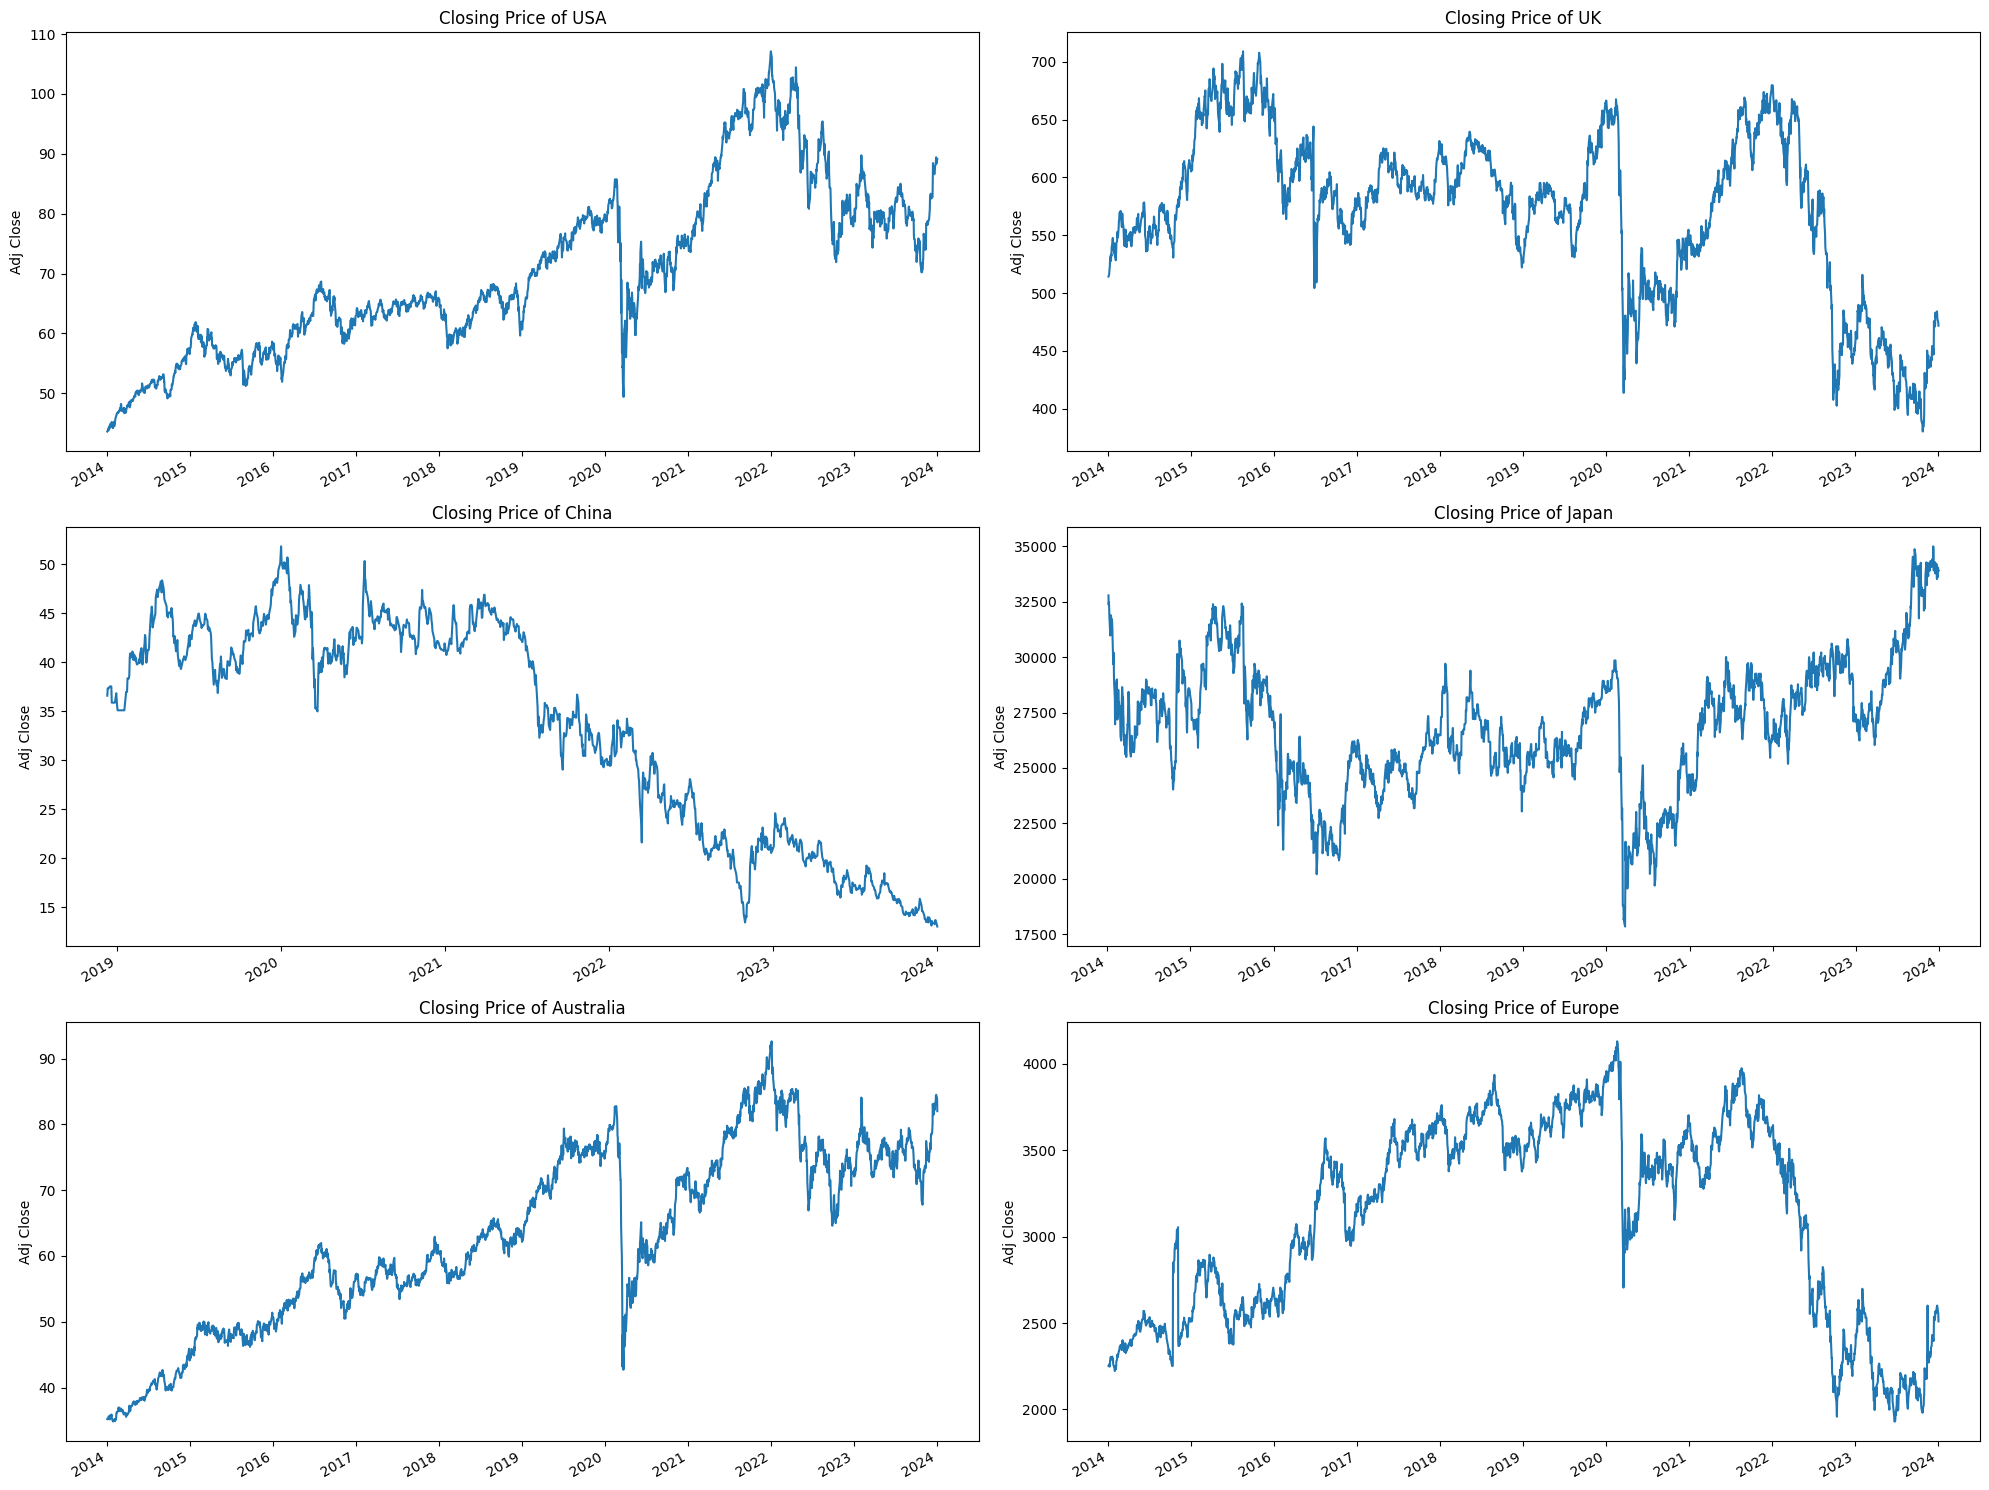

In [17]:
#sns.set_style('whitegrid')
#plt.style.use("fivethirtyeight") 

%matplotlib inline 

plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=2, bottom=1.5)

for i, c in enumerate(country,1):
    plt.subplot(3, 2, i)
    data[data['Country'] == c]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {c}")
  

plt.tight_layout()
plt.show()


#### Closing Price Analysis 

1. USA
    - Steady growth in the US real estate market in the period between 2014-2020. The market started stagnating in 2017-2018 due to a number of a rate hikes by the FED to change was previously a very low interest rate envrionment. Growth picked up in the 2019 when rates were reduced. COVID saw a sharp decline in the US real estate market and all global markets. However the US market rebounded extremely well, reaching record highs during the period analysed in 2022 before levelling out in 2023 due to increases in interest rates to try and control inflation. 

2. UK 
    - The UK shares a relatively similar story to the US, having a low interest rate environment between 2014-2016, therefore encouraging investment in real estate assets. However, there was a sharp decline in the value of this RE fund most likely due to the result of the 2016 EU referendum. What followed was a quite volatile period, probably due the economic and political uncertainty that brexit brought, fluctuations in currency, and many regulatory changes which would have deterred potential international investors. 

3. China 
    - The data for the selected Chinese real estate ETF only spans from 2019. However, China's real estate market has taken a turn for the worse post covid. The impact on the market directly after COVID actually seems relatively benign and seemed to have had a bit a rebound after the COVID related downturn. However, since early 2021, the Chinese real estate market has been on a downward spiral. In general the Chinese economy has not been performing well over the past couple of years. Trade relations with U.S. are extremely fragmented due to geopolical issues. More specific to the property market, Chinese authority have implement a range of regulatory measures on the property market in major cities to control house prices. There has been stricter regulation in other sectors like technology which has impacted some commercial real estate markets.

4. Japan 
    - Since a sharp drop in prices after COVID19, the Japanese real estate market has been going from strength to strength. There is has been a large increase in foreign direct investment over the last 5 years due to a low interest rate environment and the general perception that the market is stable.  

5. Australia 
    - Australia had a sustained period of stable growth in it's real estate market from 2014 - 2020 before COVID19. Post COVID19 shows a relatively similar pattern to the UK market. Asset prices increased sharply, peaking at the end of 2021/beginning of 2022 before levelling out in the period since. 

6. Europe 
    - Pre covid the European markets were performing really well, with substanial growth from the period between 2014 - 2020. However since COVID, the market has been struggling. Like other countries there was a post-covid rebound in Real estate prices. However, since the end of 2021, the EU has been plagued with slow economic growth and exponentially raising inflation which seems to have greatly impacted the housing market.

#### b. Sales Volume of the last 10 years 

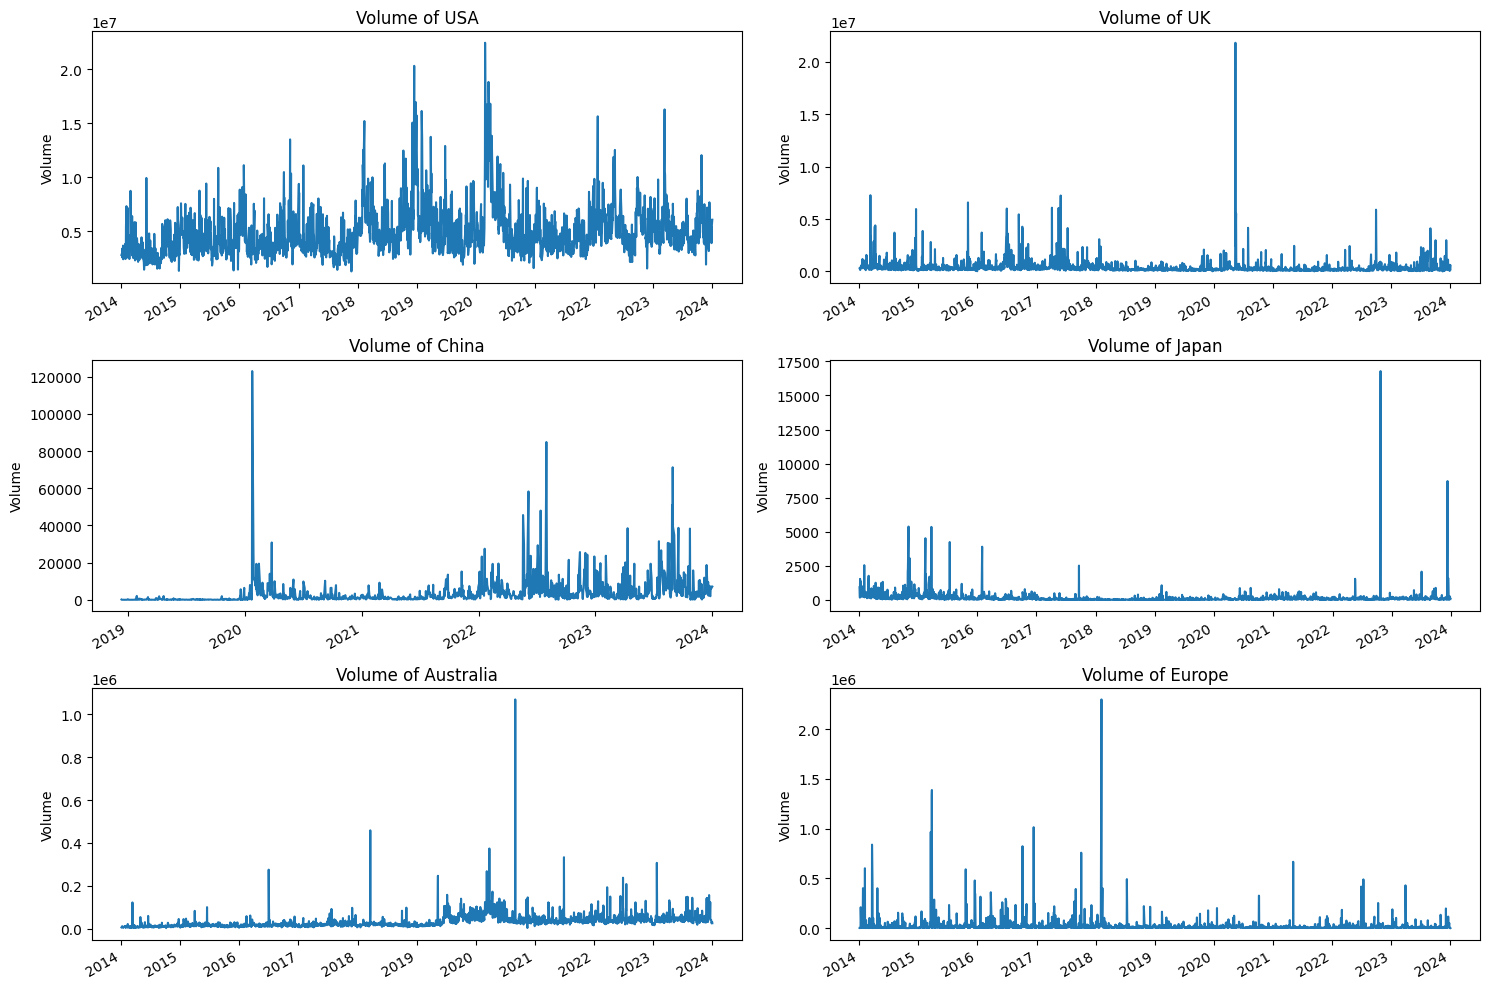

In [18]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, c in enumerate(country,1): # need to get your head around enumerate - C does not appear in this code so whats the point?
    plt.subplot(3, 2,i)
    data[data['Country'] == country[i-1]]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of {country[i - 1]}")
  
plt.tight_layout()

### 4. Moving Averages of the last 10 years 

What is a Moving Average? 

- Smooths out the visual representation of the market which show trends that we wouldn't normally spot 
- Common in trading to have a short term and long term moving average (20 and 200 days is typical). You can look at the distance between the short term and long term moving average. The distances between the 2 curves can indicate whether a stock has been overbought or oversold.   


We will calculcate 4 different types of moving averages: 

1. Simple Moving Average - Simply calculates the average over a specific time period
2. Centred Moving Average - Places equal weight on data points either side of the point being average 
3. Holt Moving Average - Also known as double exponetial smoothing, extends the EMA by introducing a trend component, considering both the average and the trend in the data. 



#### a. Simple Moving Average 



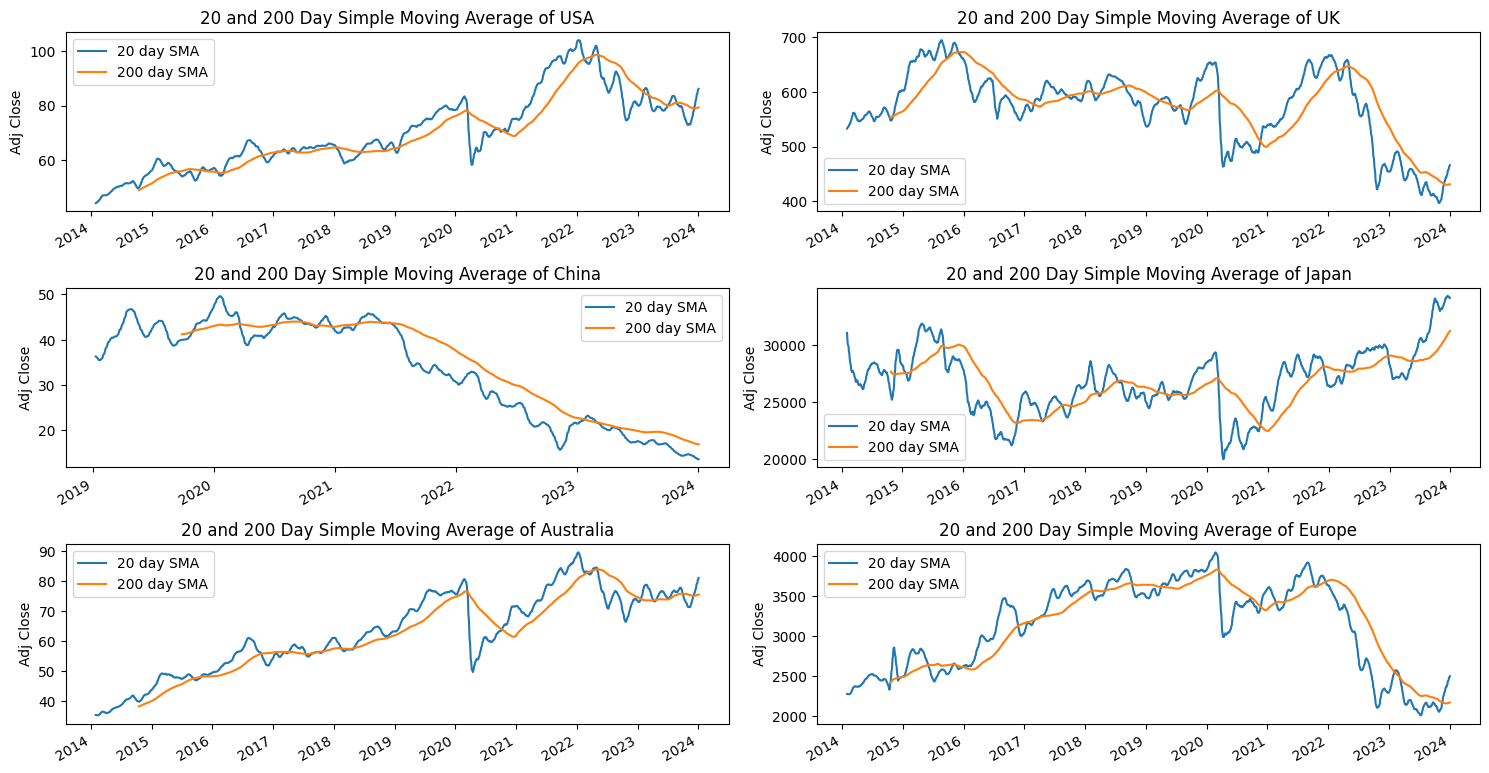

In [36]:
# Create SMA for 20 and 200 days 
ma_ndays = [20, 200] 

for ma in ma_ndays: 
    for c in country: 
        column = f"SMA ({ma} days)" 
        data.loc[data['Country'] == c, column] = data.loc[data['Country'] == c]['Adj Close'].rolling(ma).mean() # pandas moving average function 

# Plot 
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, c in enumerate(country,1):
    plt.subplot(4, 2, i)
    data[data['Country'] == country[i-1]]['SMA (20 days)'].plot(label='20 day SMA')
    data[data['Country'] == country[i-1]]['SMA (200 days)'].plot(label='200 day SMA')
    #data[data['Country'] == country[i-1]]['Adj Close'].plot(label='Actual')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"20 and 200 Day Simple Moving Average of {country[i - 1]}")
    plt.legend()
    
plt.tight_layout()

#### b. Centered Moving Average

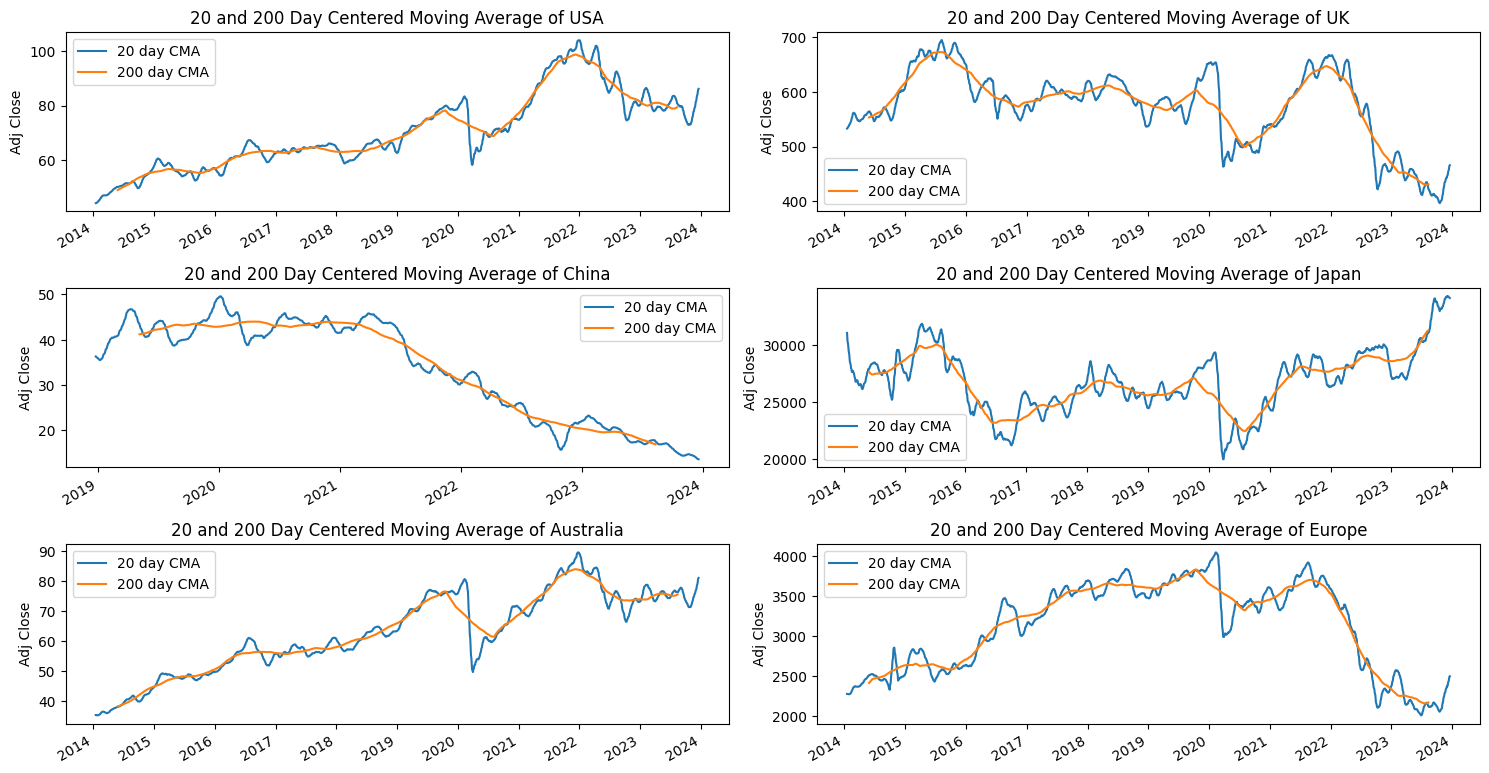

In [32]:
for ma in ma_ndays: 
    for c in country: 
        column = f"CMA ({ma} days)" 
        data.loc[data['Country'] == c, column] = data.loc[data['Country'] == c]['Adj Close'].rolling(ma, center=True).mean() # pandas moving average function 

# Plot 
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, c in enumerate(country,1):
    plt.subplot(4, 2, i)
    data[data['Country'] == country[i-1]]['CMA (20 days)'].plot(label='20 day CMA')
    data[data['Country'] == country[i-1]]['CMA (200 days)'].plot(label='200 day CMA')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"20 and 200 Day Centered Moving Average of {country[i - 1]}")
    plt.legend()
    
plt.tight_layout()

#### c. Hull Moving Average 

The Hull MA aims to reduce lag while maintaining smoothness by applying a weighted calculation that incorporates the square root of the time period. 



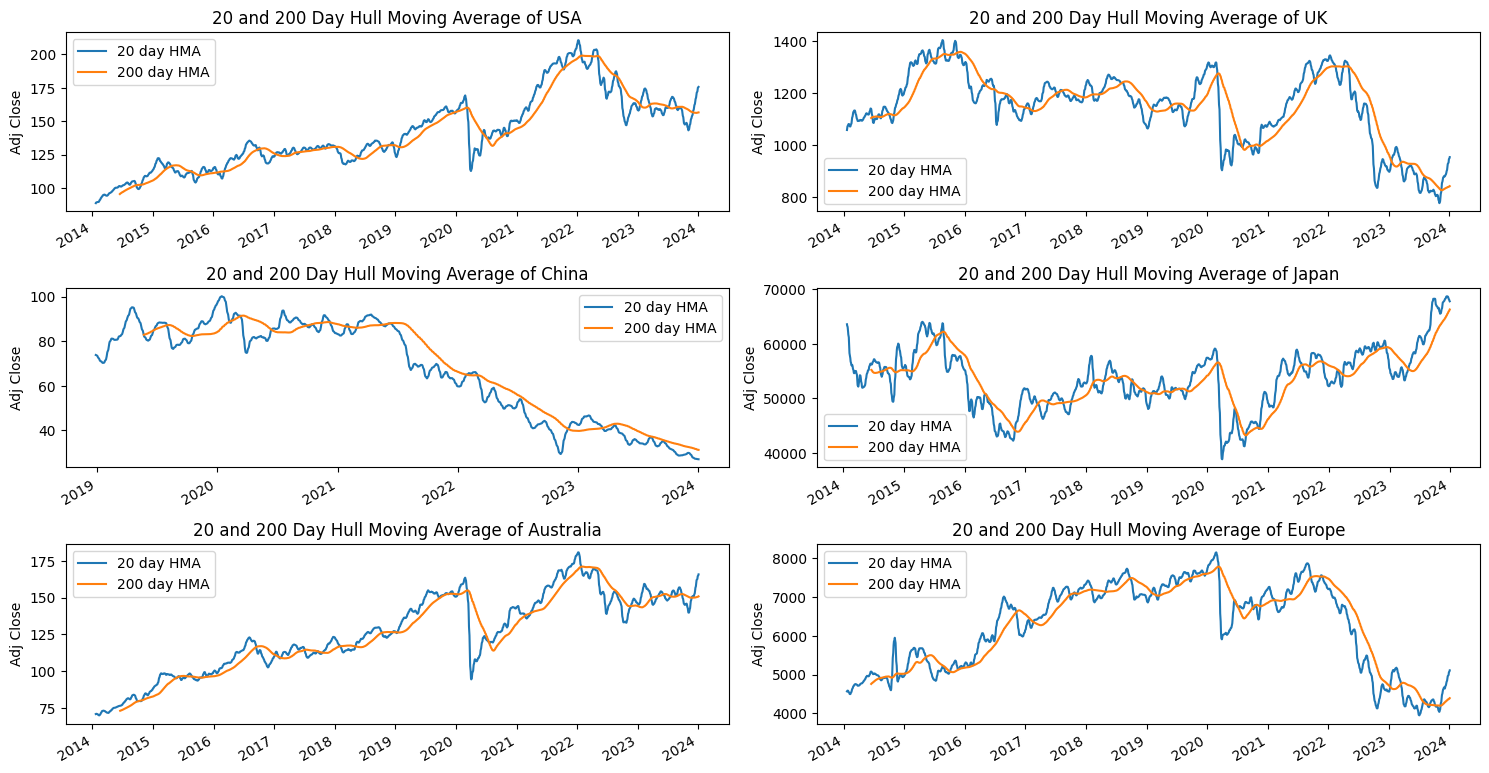

In [28]:
# Create a function for Hull Moving average 

def hma(data, window):
    weighted_ma = 2 * data.rolling(window // 2).mean()
    hull_ma = pd.Series(weighted_ma.rolling(int(np.sqrt(window))).mean(), name=f'HMA ({window})')
    return hull_ma


# Create HMA columns for 20 days and 200 days 

for ma in ma_ndays: 
    for c in country: 
        column = f"HMA ({ma} days)" 
        data.loc[data['Country'] == c, column] = hma(data.loc[data['Country'] == c]['Adj Close'], ma)
                                                                  

# Plot     
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, c in enumerate(country,1):
    plt.subplot(4, 2, i)
    data[data['Country'] == country[i-1]]['HMA (20 days)'].plot(label='20 day HMA')
    data[data['Country'] == country[i-1]]['HMA (200 days)'].plot(label='200 day HMA')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"20 and 200 Day Hull Moving Average of {country[i - 1]}")
    plt.legend()

    
    
plt.tight_layout()     